In [4]:
!pip install -q diffusers transformers accelerate

In [5]:
from diffusers import AutoPipelineForText2Image#, AutoPipelineForImage2Image
import torch

In [6]:
#pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
#pipeline = pipeline.to("cuda")

In [7]:
!nvidia-smi

Tue Feb 13 05:00:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                        On | 00000000:00:1E.0 Off |                    0 |
| N/A   26C    P8                9W /  70W|      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
prompt = '''
Climate change reduces Westminster, Colorado's rainfall and water balance, leading to drier conditions, impacting outdoor activities, agriculture, and increasing fire risks, prompting residents to prioritize water conservation.
'''

In [10]:
pipeline_text2image = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipeline_text2image = pipeline_text2image.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
image = pipeline_text2image(prompt=prompt, guidance_scale=0.0, num_inference_steps=1).images[0]

  0%|          | 0/1 [00:00<?, ?it/s]

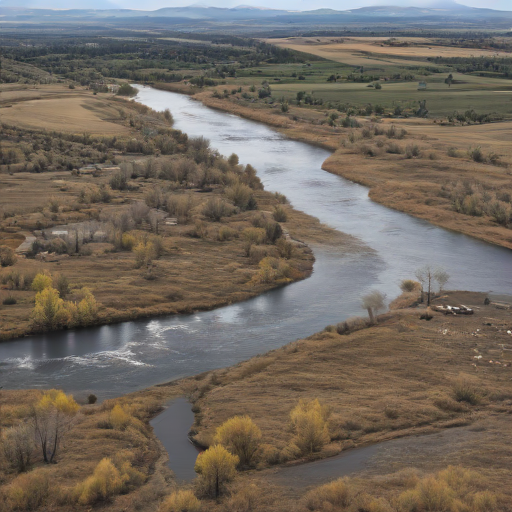

In [12]:
image

prompt = '''
In Cape Cod, Massachusetts, the climate will undergo significant changes in the future. The total annual precipitation is expected to increase by 79 mm, resulting in more rain throughout the year. This increase in rainfall could lead to frequent flooding and waterlogging in low-lying areas, making it difficult for residents to navigate and potentially damaging their properties.

Furthermore, the wettest 90 days of the year are predicted to have an increase of 46 mm in precipitation. This extended period of heavy rainfall could lead to flash floods and landslides, posing a threat to homes, infrastructure, and the overall safety of the residents.

The change in water balance, indicated by a z-score of 0.1, suggests that Cape Cod may experience slight water stress in the future. This could impact the availability of fresh water for daily activities such as drinking, agriculture, and maintaining hygiene. To adapt, residents may need to implement water conservation measures and find alternative sources of water.

The combination of increased precipitation and the associated challenges it brings, along with potential water stress, will require Cape Cod residents to adapt their daily lives. They may need to invest in flood protection measures, change their agricultural practices, and make adjustments to their water consumption habits. These changes, while necessary to mitigate the impacts of climate change, will pose significant challenges for the community.
'''

In [13]:
prompt = '''
In Cape Cod, Massachusetts, the climate will undergo significant changes in the future. The total annual precipitation is expected to increase by 79 mm, resulting in more rain throughout the year. This increase in rainfall could lead to frequent flooding and waterlogging in low-lying areas, making it difficult for residents to navigate and potentially damaging their properties.
'''

# Furthermore, the wettest 90 days of the year are predicted to have an increase of 46 mm in precipitation. This extended period of heavy rainfall could lead to flash floods and landslides, posing a threat to homes, infrastructure, and the overall safety of the residents.

  0%|          | 0/1 [00:00<?, ?it/s]

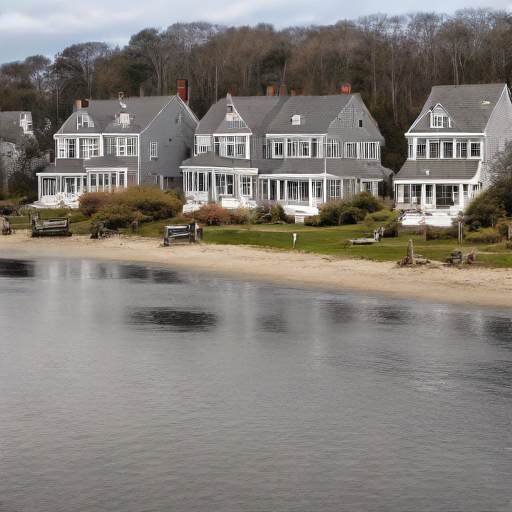

In [14]:
image = pipeline_text2image(prompt=prompt, guidance_scale=0.0, num_inference_steps=1).images[0]
image

In [15]:
prompt = '''
In Cape Cod, Massachusetts, the climate will undergo significant changes in the future. There will be an increase of 20 dry hot days a year, which will drastically impact the local weather patterns. This increase in hot and dry conditions will disrupt the coastal activities and outdoor lifestyle  that residents in Cape Cod enjoy.
'''

In [16]:
image = pipeline_text2image(prompt=prompt, guidance_scale=0.0, num_inference_steps=1).images

  0%|          | 0/1 [00:00<?, ?it/s]

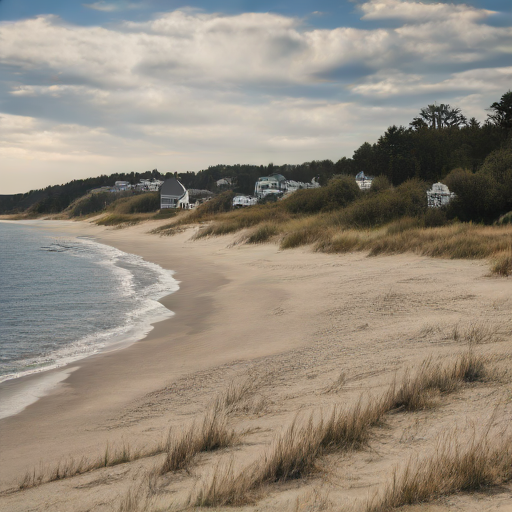

In [18]:
image[0]

In [19]:
image.from_bytes()

AttributeError: 'list' object has no attribute 'from_bytes'

In [20]:
from PIL import Image

In [21]:
Image.frombytes('L', (2, 2), image)

TypeError: a bytes-like object is required, not 'list'

In [25]:
image

[<PIL.Image.Image image mode=RGB size=512x512>]